In [236]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [237]:
os.listdir()

['MachLearnExercise04-DataPreparation-R.ipynb',
 'Sample_solution4.ipynb',
 'spam_base_train.csv',
 'spambase.names.txt',
 '.ipynb_checkpoints',
 'spambase.data.txt',
 'spambase.DOCUMENTATION.txt',
 'MachLearnExercise04.ipynb',
 'spam_base_test.csv']

In [238]:
dataframe = pd.read_csv('spam_base_train.csv')

In [239]:
def load_data(filename):
    # Split dataframe into X and Y numpy arrays, add 1 padding to X
    dataframe = pd.read_csv(filename)
    X = np.array(dataframe, dtype='float64')[:, :-1]
    X = np.pad(X, 1, 'constant', constant_values=(1))[1:X.shape[0]+1, 0:X.shape[1]+1]
    Y = np.array(dataframe, dtype='int')[:, -1:]
    
    return (X, Y)

In [240]:
X_train, Y_train = load_data('spam_base_train.csv')
X_train.shape

(3221, 58)

<h2>Logit model from exercise 3</h2>

In [465]:
def logit_predict(cross_product):
    p = 1/ (1+np.exp(-cross_product))
    return p

In [243]:
np.random.randn([1,2])

TypeError: 'list' object cannot be interpreted as an integer

In [513]:
def train_logit(X, Y):

    const = 0.00001
    #theta represents the regression coeficients, start with abitraty numbers
    theta = np.random.randn(X.shape[1]).reshape([X.shape[1],1])
    
    likelihood_old = -1e100
    converge_idx = 1.

    while converge_idx > 1e-3:
        cross_product = X.dot(theta)
        htheta = np.apply_along_axis(logit_predict, 0,cross_product)
        #sum(yi * np.transpose(theta).dot(xi) replaced by cross multiplication to increase performance)
        likelihood = np.transpose(Y).dot(cross_product) -sum(np.log(np.ones([cross_product.shape[0], 1]) +  np.exp(cross_product)))

        print(likelihood)
        converge_idx = (likelihood_old - likelihood) / likelihood_old
        likelihood_old = likelihood
        deriva = np.transpose(X).dot(Y - htheta)
        
        theta = theta + const * deriva

    return theta

In [466]:
const = 0.000001
likelihood_old = -1
converge_idx = 1.

X= X_train
Y = Y_train

    #theta represents the regression coeficients
theta = np.random.randn(X.shape[1])
theta = theta.reshape([X.shape[1],1])


In [498]:
cross_product = X.dot(theta)
#print(cross_product)                      
htheta = np.apply_along_axis(logit_predict, 0,cross_product)
#sum(yi * np.transpose(theta).dot(x)) replaced by cross multiplication to increase performance)
#likelihood =  sum(Y[i,]*X[i,:].dot(theta) - np.log(1+np.exp(X[i,:].dot(theta))) for i in range(0,X.shape[0]))
likelihood = sum(Y * cross_product - np.log(np.ones([cross_product.shape[0], 1]) +  np.exp(cross_product)))
print(likelihood)
#print(likelihood2)


#print(np.transpose(Y).dot(cross_product))
print(np.log(np.ones([cross_product.shape[0], 1]) +  np.exp(cross_product)))
print(likelihood)        
converge_idx = (likelihood_old - likelihood) / likelihood_old
likelihood_old = likelihood
deriva = np.transpose(X).dot(Y - htheta)
theta = theta + const * deriva


[-9226.28880977]
[[  2.25431563e-01]
 [  7.23696425e-06]
 [  6.19901353e-01]
 ..., 
 [  2.80593848e+00]
 [  9.98973732e-01]
 [  3.70434354e+00]]
[-9226.28880977]


In [512]:
deriva.shape
theta.shape

(58, 1)

<h2> Apply model & Report F Measure</h2>

In [514]:
coef = train_logit(X_train, Y_train)
np.transpose(coef)

[[-7374.52412298]]
[[-7290.64179539]]
[[-7208.04517415]]
[[-7126.73224836]]
[[-7046.699601]]
[[-6967.94239723]]
[[-6890.45438318]]
[[-6814.227895]]
[[-6739.25387844]]
[[-6665.52192001]]
[[-6593.02029075]]
[[-6521.73600298]]
[[-6451.65487965]]
[[-6382.76163484]]
[[-6315.03996299]]
[[-6248.4726345]]
[[-6183.04159451]]
[[-6118.72806274]]
[[-6055.51263214]]
[[-5993.3753651]]
[[-5932.29588633]]
[[-5872.25347212]]
[[-5813.227136]]
[[-5755.19571121]]
[[-5698.13793021]]
[[-5642.03250141]]
[[-5586.85818288]]
[[-5532.59385245]]
[[-5479.2185735]]
[[-5426.71165515]]
[[-5375.05270627]]
[[-5324.22168236]]
[[-5274.19892539]]
[[-5224.96519649]]
[[-5176.5017025]]
[[-5128.790117]]
[[-5081.81259728]]
[[-5035.55179817]]
[[-4989.99088402]]
[[-4945.11353977]]
[[-4900.90398161]]
[[-4857.34696799]]
[[-4814.42781079]]
[[-4772.13238675]]
[[-4730.44714862]]
[[-4689.35913527]]
[[-4648.85597998]]
[[-4608.92591547]]
[[-4569.55777448]]
[[-4530.74098417]]
[[-4492.46555285]]
[[-4454.72204766]]
[[-4417.50156192]]
[[-43

[[-1328.86994295]]
[[-1327.46458137]]
[[-1326.064756]]
[[-1324.67043126]]
[[-1323.2815719]]
[[-1321.89814302]]
[[-1320.52011001]]
[[-1319.14743863]]
[[-1317.78009492]]
[[-1316.41804524]]
[[-1315.06125627]]
[[-1313.709695]]
[[-1312.36332869]]
[[-1311.02212493]]
[[-1309.68605158]]
[[-1308.3550768]]
[[-1307.02916904]]
[[-1305.70829701]]
[[-1304.39242972]]
[[-1303.08153644]]
[[-1301.77558672]]
[[-1300.47455035]]


array([[-0.49471476,  0.1403641 , -1.47618252,  0.19580057,  0.10130349,
         0.31961017, -0.32234999,  1.25924504,  0.06624995, -0.5312372 ,
        -0.36556667, -0.01390406, -0.64349077, -0.07433903,  0.18486409,
         2.17554996,  0.3969633 , -0.43988543,  1.17950261, -0.14702266,
         0.04771626,  0.65038309,  0.29439132,  1.93748963,  0.88064573,
        -0.99037639,  0.30656693, -2.87563336,  0.15221966, -0.58595667,
        -0.13379095,  0.82518607, -1.35749657, -0.03525806, -0.20701641,
        -1.1520507 , -0.41340384,  0.78928225, -0.24706492, -0.16870471,
        -0.85265788, -0.31706432, -0.65735664,  0.4951344 ,  0.9490159 ,
        -0.57590861, -0.20772611,  1.11572927,  0.26659141, -0.56373949,
        -0.83785314, -2.27615671,  1.52039334,  2.20179102, -0.29078232,
         0.84107068, -0.86018732,  0.72831014]])

In [500]:
X_test, Y_test = load_data('spam_base_test.csv')
X_test.shape

(1380, 58)

In [501]:
Y_hat = np.array([logit_predict(X_test[idx, :].dot(coef)) for idx in range(0, X_test.shape[0])])
Y_hat = Y_hat.round()
acc = sum(Y_hat == Y_test) / Y_test.shape[0]
acc

array([ 0.82681159])

In [549]:
def F_score(Y, Y_hat, beta):
    true_positives = sum(np.logical_and(Y == True, Y_hat == True))
    false_positives = sum(np.logical_and(Y == False, Y_hat == True))
    false_negatives = sum(np.logical_and(Y == True, Y_hat == False))
    
    precision =  true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    F = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
    
    return F

In [550]:
F_beta = np.array([[beta , F_score(Y_test, Y_hat, beta)] for beta in np.arange(0.5, 1.01, 0.05)])
F_beta

array([[ 0.5       ,  0.79563492],
       [ 0.55      ,  0.792845  ],
       [ 0.6       ,  0.79005621],
       [ 0.65      ,  0.78730004],
       [ 0.7       ,  0.78460185],
       [ 0.75      ,  0.78198128],
       [ 0.8       ,  0.7794529 ],
       [ 0.85      ,  0.77702688],
       [ 0.9       ,  0.77470967],
       [ 0.95      ,  0.77250473],
       [ 1.        ,  0.77041306]])

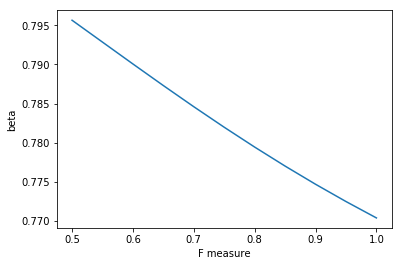

In [504]:
plt.plot(F_beta[:, 0], F_beta[:, 1])
plt.xlabel('F measure')
plt.ylabel('beta')
plt.show()

# Logistic Ridge Regression

In [551]:
def ridge_ll(X,Y,theta, delta):
    return  np.transpose(Y).dot(X.dot(theta)) -sum(np.log(np.ones([X.dot(theta).shape[0], 1]) +  np.exp(X.dot(theta)))) - 0.5 * delta * np.transpose(theta).dot(theta)



In [542]:
def deriva_ridge_ll(X, Y, htheta, delta):
    deriva = np.transpose(X).dot(Y - htheta)
    deriva = deriva - delta * theta
    return deriva

In [552]:
def gradient_descent_solution(X_train, Y_train, delta):
    const = 0.00001
    #theta represents the regression coeficients, start with abitraty numbers
    theta = np.random.randn(X.shape[1]).reshape([X.shape[1],1])
    
    likelihood_old = -1e100
    converge_idx = 1.

    while converge_idx > 1e-3:
        cross_product = X.dot(theta)
        htheta = np.apply_along_axis(logit_predict, 0,cross_product)
        likelihood = ridge_ll(X_train, Y_train, theta, delta)

        print(likelihood)
        converge_idx = (likelihood_old - likelihood) / likelihood_old
        likelihood_old = likelihood
        deriva = deriva_ridge_ll(X, Y, htheta, delta)
        #print(deriva)
        theta = theta + const * deriva

    return theta

In [553]:
coefRidge = gradient_descent_solution(X_train, Y_train, 5)

[[-7089.05077824]]
[[-6987.34676951]]
[[-6886.83605452]]
[[-6787.50119932]]
[[-6689.32560608]]
[[-6592.2939142]]
[[-6496.39230937]]
[[-6401.60880903]]
[[-6307.9335974]]
[[-6215.35948848]]
[[-6123.88260719]]
[[-6033.50340021]]
[[-5944.22812353]]
[[-5856.07100417]]
[[-5769.05733887]]
[[-5683.22786819]]
[[-5598.64482901]]
[[-5515.4000926]]
[[-5433.62562333]]
[[-5353.50592461]]
[[-5275.29082469]]
[[-5199.30453764]]
[[-5125.94353645]]
[[-5055.65301236]]
[[-4988.8735635]]
[[-4925.96095135]]
[[-4867.10119688]]
[[-4812.25779389]]
[[-4761.17956581]]
[[-4713.46593229]]
[[-4668.6557551]]
[[-4626.30187162]]
[[-4586.01334429]]
[[-4547.46870508]]
[[-4510.41206421]]
[[-4474.64239811]]
[[-4440.00189541]]
[[-4406.36580006]]
[[-4373.6343543]]
[[-4341.72668603]]
[[-4310.57626491]]
[[-4280.12754867]]
[[-4250.33350743]]
[[-4221.15378769]]
[[-4192.55334112]]
[[-4164.5013918]]
[[-4136.97065128]]
[[-4109.9367162]]
[[-4083.3776017]]
[[-4057.27337636]]
[[-4031.60587406]]
[[-4006.35846426]]
[[-3981.51586718]]
[[

In [546]:
np.transpose(coefRidge)

array([[-0.08346569, -0.26237507, -1.54010981,  0.08618035, -0.50178786,
         0.33243621, -0.08303478,  0.4120809 ,  0.19661126,  1.36154603,
        -0.47868523,  1.86424611, -0.0389953 ,  1.09430415,  0.46052652,
         0.81091661,  0.12017748,  0.10900178, -0.15544495,  0.1697221 ,
        -0.07858883,  0.22621054,  1.35062192,  0.40862471, -0.48063267,
        -0.72881165, -1.69215876, -1.33466538, -0.22742923, -0.52029342,
        -0.67760561, -0.14103929,  1.86946465,  0.14890152, -1.73259208,
        -0.17769188, -1.62057453,  0.54595179,  1.17967113, -1.26466721,
        -0.32881149, -0.0825428 ,  0.0832216 ,  0.2739858 ,  0.02917537,
        -1.21460958, -0.92647118, -0.09867202,  0.01112885,  0.22937695,
         0.03104767, -0.91259783,  0.3121132 ,  0.33514504,  0.55732209,
         1.08939663,  0.67230762,  0.83534821]])

For the logistic ridge regression we introduce a new parameter `l`, which is usually denoted as lambda. This controls the penality added on top of the likelihood. The penality itself is the squared euclidean norm of the theta vector. Because the euclidian norm is a square root itself, we transformed the formula for better numerical stability.

In [17]:
coefRidge = train_ridge_logit(X_train, Y_train, 5)
np.transpose(coefRidge[0])

array([[-0.02805595,  0.00205158, -0.00914315,  0.00573615,  0.00692994,
         0.01310739,  0.00573449,  0.01469252,  0.00818826,  0.00636297,
         0.00328708,  0.00435962, -0.01548288,  0.00197417,  0.00035848,
         0.00553423,  0.02280241,  0.01124735,  0.00971271,  0.01531798,
         0.01103123,  0.03686321,  0.00787759,  0.01297281,  0.01057831,
        -0.06898876, -0.03335918, -0.07706435, -0.01466624, -0.01214646,
        -0.01290086, -0.00872363, -0.00583337, -0.01216267, -0.00581915,
        -0.01379408, -0.01024531, -0.01404293, -0.00128035, -0.00997825,
        -0.00480489, -0.00620655, -0.01791639, -0.00545112, -0.01150035,
        -0.02655583, -0.02330925, -0.00060838, -0.00433375, -0.00374318,
        -0.00758666, -0.00152014,  0.01905912,  0.00816083,  0.00258316,
         0.01202989,  0.0267935 ,  0.0332524 ]])

Coefficients for a lambda of 5

In [555]:
def k_fold(X_train, i, k):
    if i >= k:
        raise ValueError('invalid value for i')
    
    chunk = int(X_train.shape[0] / k)
    remain = X_train.shape[0] % k
    
    start = int(chunk * i)
    stop = int(start + chunk)
    
    if (i + 1) == k:
        stop = int(stop + remain)
    
    return (X_train[start:stop], np.append(X_train[0:start], X_train[stop:], axis=0))

The inner k-folding function calculates chunk sizes based on the k splits and the given dataset size. It then returns the desired chunk denoted by `i` and merges the remaining data points a second set. In cross validation, the chunk is used for validation while the remainder is used for training.

In [ ]:
def cross_ridge_logit(X_train, Y_train, X_test, Y_test):
    deltas = []
    f_scores = []
    
    for l in np.arange(1, 500, 10):
        coefSum = np.zeros([X_train.shape[1], 1])
        deltaSum = 0
        
        for i in range(4, -1, -1):
            X_validation, X_train_local = k_fold(X_train, i, 5)
            Y_validation, Y_train_local = k_fold(Y_train, i, 5)
            
            coefRidge = gradient_descent_solution(X_train_local, Y_train_local, l)
            coefSum = coefSum + coefRidge
            deltaSum = deltaSum + delta
        
        coef = coefSum / 5
        Y_hat = np.array([logit_predict(X_test[idx, :], coef) for idx in range(0, X_test.shape[0])]).round()
        
        deltas.append([l, deltaSum / 5])
        f_scores.append([l, F_score(Y_test, Y_hat, 0.5)])
    
    return (coef, deltas, f_scores)

In [556]:
def cross_ridge_logit(X_train, Y_train, X_test, Y_test):
    deltas = []
    f_scores = []
    
    for l in np.arange(1, 500, 10):
        coefSum = np.zeros([X_train.shape[1], 1])
        deltaSum = 0
        
        for i in range(4, -1, -1):
            X_validation, X_train_local = k_fold(X_train, i, 5)
            Y_validation, Y_train_local = k_fold(Y_train, i, 5)
            
            coefRidge, delta = train_ridge_logit(X_train_local, Y_train_local, l)
            coefSum = coefSum + coefRidge
            deltaSum = deltaSum + delta
        
        coef = coefSum / 5
        Y_hat = np.array([logit_predict(X_test[idx, :], coef) for idx in range(0, X_test.shape[0])]).round()
        
        deltas.append([l, deltaSum / 5])
        f_scores.append([l, F_score(Y_test, Y_hat, 0.5)])
    
    return (coef, deltas, f_scores)

Using `k_fold()` this the crossvalidating implementation of thelogistic ridge regression iterates over a range of possible lambda values. For each lamba, a 5-fold cross validation is executed by calculating the coefficients for each of the 5 combinations of the chunk and remainder out of the train dataset. We let lambda range from 1 to 100.

In [20]:
out = cross_ridge_logit(X_train, Y_train, X_test, Y_test)

We now calculate the 5-fold cross validated logistic ridge regression and plot the parameters, using a F Score with beta of 0.5.

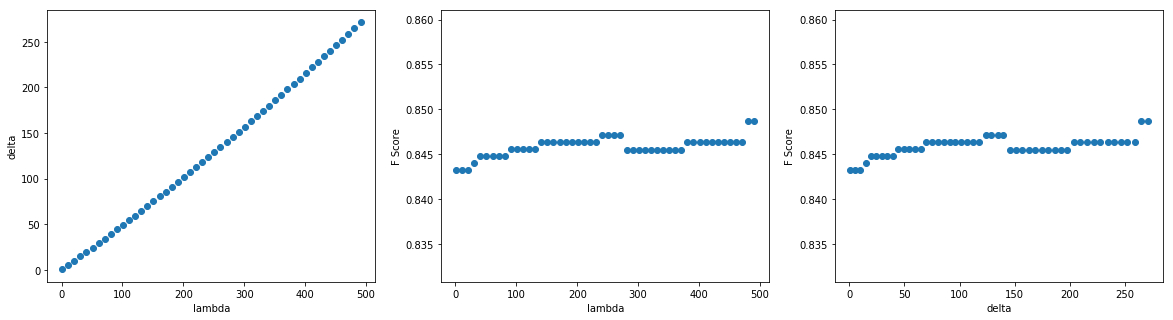

In [23]:
plt.figure(1, figsize=(20, 5))

plt.subplot2grid((1, 3), (0, 0))
plt.scatter(
    np.array(out[1]).T[0],
    np.array(out[1]).T[1],
)
plt.xlabel('lambda')
plt.ylabel('delta')

plt.subplot2grid((1, 3), (0, 1))
plt.scatter(
    np.array(out[2]).T[0],
    np.array(out[2]).T[1],
)
plt.xlabel('lambda')
plt.ylabel('F Score')

plt.subplot2grid((1, 3), (0, 2))
plt.scatter(
    np.array(out[1]).T[1],
    np.array(out[2]).T[1],
)
plt.xlabel('delta')
plt.ylabel('F Score')

plt.show()